# Complete this project

In [1]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# The Breast Cancer Dataset
data = load_breast_cancer()
print("Examples = ",data.data.shape ," Labels = ", data.target.shape)

print("-----------------------------------------------------------------------")
print("Example 0 : \n",data.data[0],"\nLabel 0 : \n",data.target[0])

print("-----------------------------------------------------------------------")
# Dataset to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["diagnosis"] = pd.Series(data.target)
print("Info : \n",df.info())


Examples =  (569, 30)  Labels =  (569,)
-----------------------------------------------------------------------
Example 0 : 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 
Label 0 : 
 0
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float6

diagnosis        : 
 1    357
0    212
Name: diagnosis, dtype: int64


1    0.627417
0    0.372583
Name: diagnosis, dtype: float64


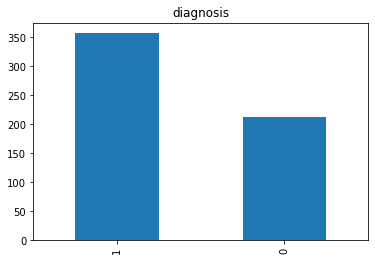

In [3]:
# Lets know how many values for malignant and for benign type of cancer
print("diagnosis        : \n",df["diagnosis"].value_counts())
print("\n")
print(df["diagnosis"].value_counts(normalize=True))

# plot.bar(title='') function is used to plot bargraph 
df["diagnosis"].value_counts().plot.bar(title="diagnosis")


In [4]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

Number of duplicate rows :  (0, 31)


SUM : 
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64


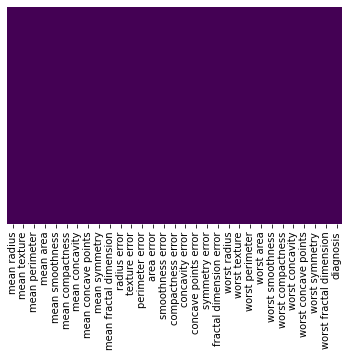

In [5]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# df["col"] = df["col"].fillna(df["col"].mean())
# df["col"] = df["col"].fillna(df["col"].interpolate())

In [6]:
# Define X variables and our target(y)
X = df.drop(["diagnosis"],axis=1).values
y = df["diagnosis"].values
print("X : ",X.shape," y : ",y.shape)

# Standardization
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
my_scaler.fit(X)
X_scaler = my_scaler.transform(X)

# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, 
                       y, test_size= 0.20, random_state=100, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)


X :  (569, 30)  y :  (569,)
X_train =  (455, 30)  y_train =  (455,)
X_test  =  (114, 30)  y_test  =  (114,)


In [7]:
# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(32,  activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))



In [8]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[keras.metrics.BinaryAccuracy()])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 31ms/step - loss: 0.9361 - binary_accuracy: 0.2390 - val_loss: 0.8114 - val_binary_accuracy: 0.4176
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7361 - binary_accuracy: 0.4918 - val_loss: 0.6406 - val_binary_accuracy: 0.6484
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5919 - binary_accuracy: 0.6841 - val_loss: 0.5229 - val_binary_accuracy: 0.8242
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4941 - binary_accuracy: 0.8159 - val_loss: 0.4449 - val_binary_accuracy: 0.8791
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4268 - binary_accuracy: 0.8956 - val_loss: 0.3896 - val_binary_accuracy: 0.8791
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3758 - binary_accuracy: 0.9313 - val_loss: 0.3452 - val_binary_accuracy: 0.9231
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3331 

6/6 [==============================] - 0s 10ms/step - loss: 0.0502 - binary_accuracy: 0.9890 - val_loss: 0.0754 - val_binary_accuracy: 0.9670
Epoch 55/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0493 - binary_accuracy: 0.9890 - val_loss: 0.0748 - val_binary_accuracy: 0.9670
Epoch 56/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0485 - binary_accuracy: 0.9890 - val_loss: 0.0743 - val_binary_accuracy: 0.9670
Epoch 57/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0477 - binary_accuracy: 0.9918 - val_loss: 0.0740 - val_binary_accuracy: 0.9670
Epoch 58/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0470 - binary_accuracy: 0.9918 - val_loss: 0.0750 - val_binary_accuracy: 0.9780
Epoch 59/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0460 - binary_accuracy: 0.9918 - val_loss: 0.0744 - val_binary_accuracy: 0.9780
Epoch 60/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0452 - binary_

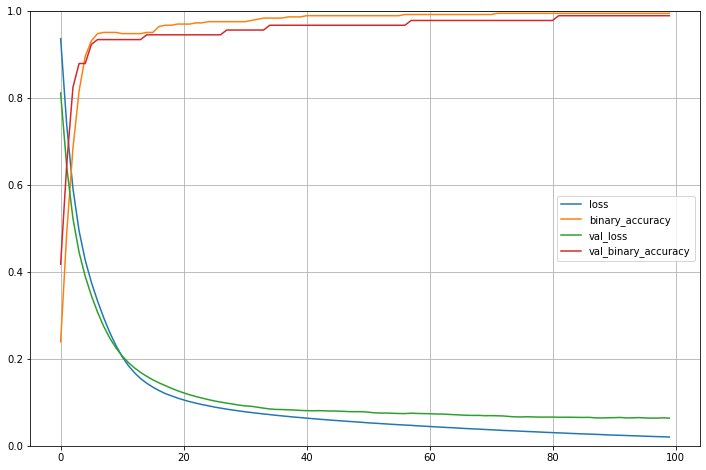

4/4 [==============================] - 0s 4ms/step - loss: 0.0552 - binary_accuracy: 0.9825
Loss     :  0.05517180636525154
accuracy :  0.9824561476707458


In [9]:
# Plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion matrix : 



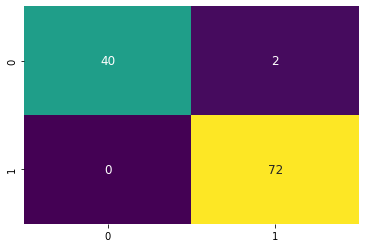

Normalized confusion matrix : 



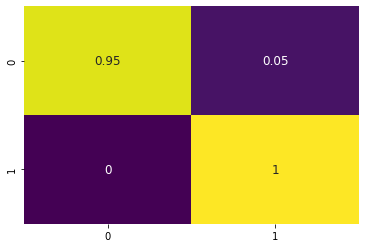

In [10]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")


In [11]:
# Make predictions
# predicted = my_model.predict(X_new)

# Save the model
# my_model.save("/content/my_model.h5")
